# CNN Fruit Classification

Arif Rhizky Gilang Purnama

140810170030

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import random

In [2]:
class CNN():
    def __init__(self, dir, batch_size=32, validation=0.2, dropout_rate=0.5, epochs=10):
        self.dir = dir
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.validation = validation
        self.epochs = epochs

    def get_stat(self):
        self.apple_length = len(os.listdir(self.dir + "apple"))
        self.orange_length = len(os.listdir(self.dir + "orange"))
        self.pear_length = len(os.listdir(self.dir + "pear"))

        print("Apple Dataset: " + str(self.apple_length))
        print("Orange Dataset: " + str(self.orange_length))
        print("Pear Dataset: " + str(self.pear_length))

        self.data_length = self.apple_length + self.orange_length + self.pear_length

    def fit(self):
        train_image_generator = ImageDataGenerator(
            rescale=1./255,
            validation_split=self.validation
        )
        self.train_ds = train_image_generator.flow_from_directory(
            batch_size=self.batch_size,
            directory=self.dir,
            shuffle=True,
            target_size=(100,100),
            class_mode='categorical',
            subset='training'
        )
        self.test_ds = train_image_generator.flow_from_directory(
            batch_size=self.batch_size,
            directory=self.dir,
            shuffle=True,
            target_size=(100,100),
            class_mode='categorical',
            subset='validation'
        )
        self.compile_model()
    
    def compile_model(self):
        IMG_HEIGHT = 100
        IMG_WIDTH = 100

        self.model = Sequential()

        self.model.add(Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2,2)))

        self.model.add(Conv2D(64, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2,2)))

        self.model.add(Conv2D(128, (3, 3), activation='relu'))
        self.model.add(MaxPooling2D(pool_size=(2,2)))

        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dropout(self.dropout_rate))
        self.model.add(Dense(3, activation='softmax'))

        self.model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        print("Model Summary")
        self.model.summary()
    
    def train(self):
        total_train_ds = np.ceil((self.data_length*(1-self.validation)/self.batch_size)-1)
        total_test_ds = np.ceil((self.data_length*self.validation/self.batch_size)-1)

        self.history = self.model.fit_generator(
            self.train_ds,
            steps_per_epoch=total_train_ds,
            epochs=self.epochs,
            validation_data=self.test_ds,
            validation_steps=total_test_ds
        )

    def show_plot(self):
        acc = self.history.history['accuracy']
        val_acc = self.history.history['val_accuracy']

        loss = self.history.history['loss']
        val_loss = self.history.history['val_loss']

        epochs_range = range(self.epochs)

        plt.figure(figsize=(8, 8))
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')
        plt.show()

    def custom predict()

    def random_predict(self, random_folder="apple"):
        if random_folder == "apple":
            random_length = self.apple_length
        elif random_folder == "orange":
            random_length = self.orange_length
        elif random_folder == "pear":
            random_length = self.pear_length
        else:
            random_folder = "apple"
            random_length = self.apple_length

        image_dir = os.listdir(self.dir + random_folder + "/")
        random_number = random.randint(0, random_length)
        image = self.dir + random_folder + "/" + image_dir[random_number]

        test_image = Image.open(image)
        prep_img = np.array(test_image)/255.0

        images = []
        images.append(prep_img)
        classes = self.model.predict_classes(np.array(images))

        for n in classes:
            if n == 0:
                prediction = 'Apple'
            elif n == 1:
                prediction = 'Orange'
            elif n == 2:
                prediction = 'Pear'
            print("")
            print("Getting random image from folder " + random_folder + " with image index: " + str(random_number))
            print("Prediction:", prediction)

            plt.axis("off")
            plt.imshow(test_image)
            plt.show()
        # lorem


In [3]:
dir = "dataset"
parent_dir = str(os.getcwd()) + '/' + dir + '/'

cnn = CNN(dir=parent_dir, batch_size=256, dropout_rate=0.8)
cnn.get_stat()

Apple Dataset: 456
Orange Dataset: 479
Pear Dataset: 492


In [4]:
cnn.fit()

Found 1143 images belonging to 3 classes.
Found 284 images belonging to 3 classes.
Model Summary
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________

In [5]:
cnn.train()

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
4/4 [==============================] - 14s 4s/step - loss: 1.0233 - accuracy: 0.4848 - val_loss: 0.6615 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 12s 3s/step - loss: 0.5969 - accuracy: 0.8095 - val_loss: 0.1009 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 14s 3s/step - loss: 0.2074 - accuracy: 0.9301 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 13s 3s/step - loss: 0.1019 - accuracy: 0.9639 - val_loss: 6.9106e-04 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 12s 3s/step - loss: 0.0855 - accuracy: 0.9658 - val_loss: 1.1674e-04 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 11s 3s/step - loss: 0.0606 - accuracy: 0.9741 - val_loss: 6.4074e-06 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 12s 3s/step - loss: 0.0428 - accur

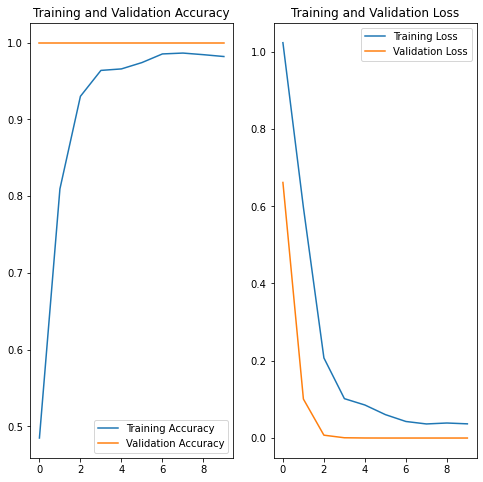

In [6]:
cnn.show_plot()

## Predicting
Change the parameter 'random_folder' into "orange" or "apple" or "pear" to get random image from the dataset and predict it


Getting random image from folder pear with image index: 185
Prediction: Pear


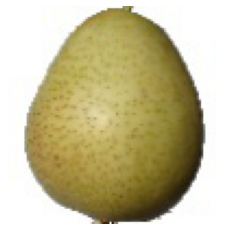

In [25]:

cnn.random_predict(random_folder="pear")